In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Load dataset 
df = pd.read_csv("spotify_songs.csv")

In [25]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\2731975622.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='crest')


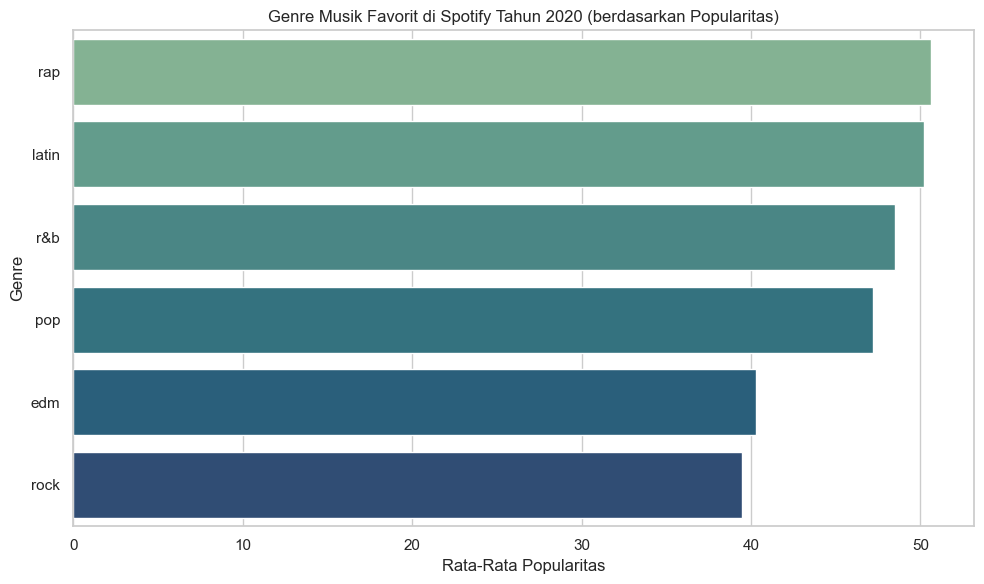

<Figure size 640x480 with 0 Axes>

In [26]:
# Ubah tanggal rilis jadi datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Filter lagu tahun 2020 
df_2020 = df[df['track_album_release_date'].dt.year == 2020]

# Hitung rata-rata popularitas per genre
genre_popularity = df_2020.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='crest')
plt.title("Genre Musik Favorit di Spotify Tahun 2020 (berdasarkan Popularitas)")
plt.xlabel("Rata-Rata Popularitas")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

plt.savefig("plot_genre_musik_favotit.png", dpi=300, bbox_inches="tight")


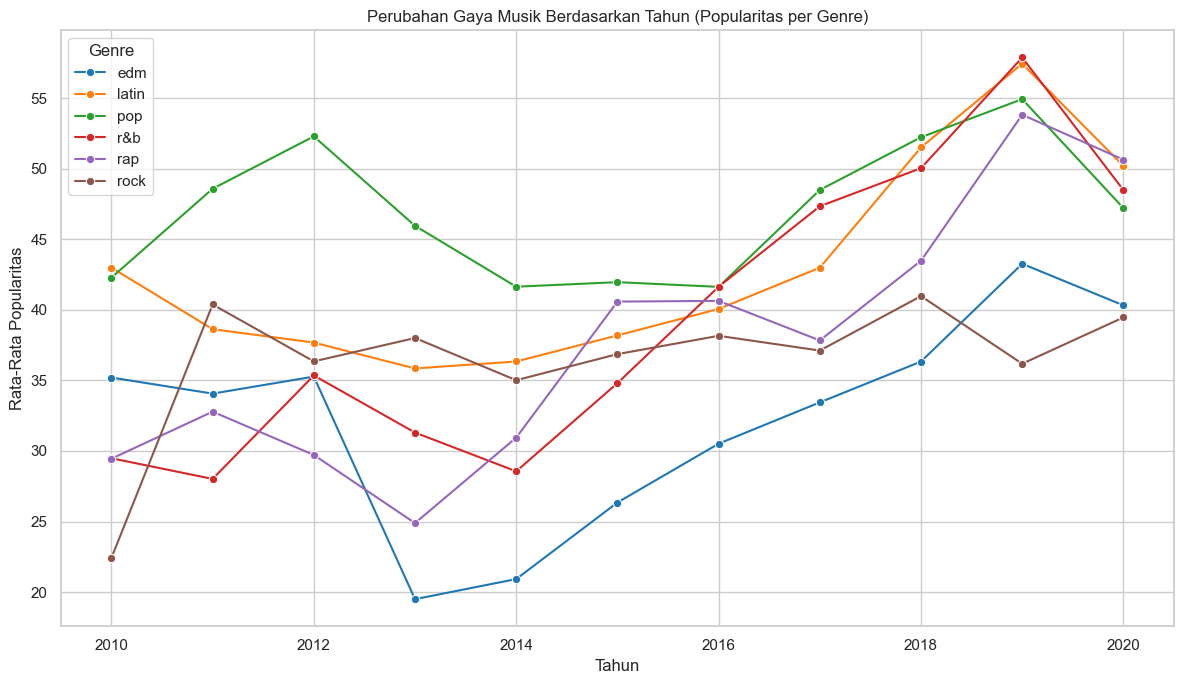

<Figure size 640x480 with 0 Axes>

In [27]:
# Ubah tanggal rilis jadi datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Ekstrak tahun
df['year'] = df['track_album_release_date'].dt.year

# Hitung rata-rata popularitas per genre per tahun
genre_trend = df.groupby(['year', 'playlist_genre'])['track_popularity'].mean().reset_index()

# Filter tahun >= 2010 (opsional biar lebih relevan)
genre_trend = genre_trend[genre_trend['year'] >= 2010]

# Plot line chart
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=genre_trend,
    x='year',
    y='track_popularity',
    hue='playlist_genre',
    marker='o',
    palette='tab10'
)
plt.title("Perubahan Gaya Musik Berdasarkan Tahun (Popularitas per Genre)")
plt.xlabel("Tahun")
plt.ylabel("Rata-Rata Popularitas")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()

plt.savefig("plot_perubahan_gaya_musik.png", dpi=300, bbox_inches="tight")


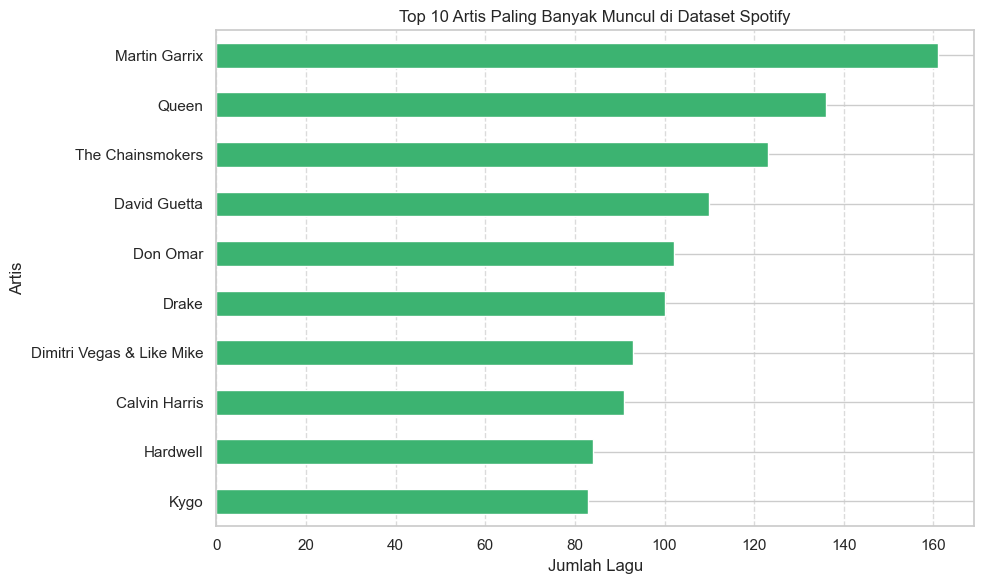

<Figure size 640x480 with 0 Axes>

In [28]:
# Top 10 artis yang paling sering muncul
top_artists = df['track_artist'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_artists.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Artis Paling Banyak Muncul di Dataset Spotify')
plt.xlabel('Jumlah Lagu')
plt.ylabel('Artis')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.savefig("plot_top_10_artis.png", dpi=300, bbox_inches="tight")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\3073514044.py:36: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


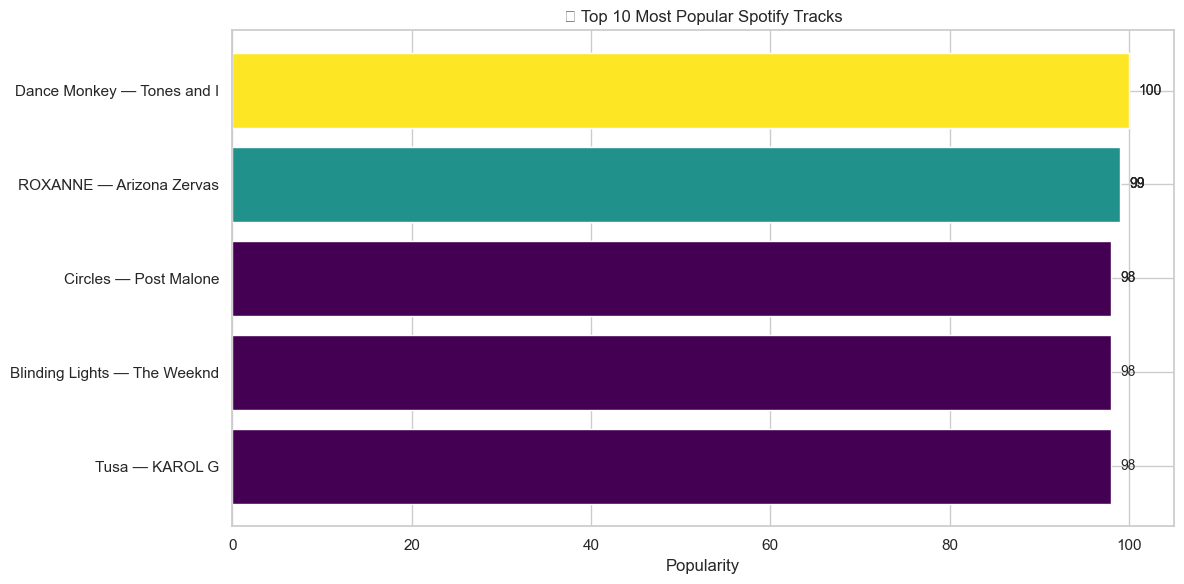

<Figure size 640x480 with 0 Axes>

In [29]:
# Pastikan kolom popularitas numerik
df['track_popularity'] = pd.to_numeric(df['track_popularity'], errors='coerce')

# Ambil 10 lagu paling populer
top_10 = (
    df.sort_values(by='track_popularity', ascending=False)
    .dropna(subset=['track_popularity'])
    .head(10)
    .copy()
)

# Gabungkan nama lagu dan artis
top_10['track_label'] = top_10['track_name'] + " — " + top_10['track_artist']

# Set gaya visual
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Buat colormap gradien berdasarkan popularitas
colors = sns.color_palette("viridis", as_cmap=True)
norm = plt.Normalize(top_10['track_popularity'].min(), top_10['track_popularity'].max())
bar_colors = [colors(norm(p)) for p in top_10['track_popularity']]

# Plot horizontal bar
bars = plt.barh(top_10['track_label'], top_10['track_popularity'], color=bar_colors)

# Tambahkan label angka popularitas di ujung bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10)

plt.xlabel("Popularity")
plt.title("🎧 Top 10 Most Popular Spotify Tracks")
plt.gca().invert_yaxis()  # Biar ranking tertinggi di atas
plt.tight_layout()
plt.show()

plt.savefig("plot_top_10_popular.png", dpi=300, bbox_inches="tight")


Popularitas Lagu dan Faktor Musik

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\1468525602.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


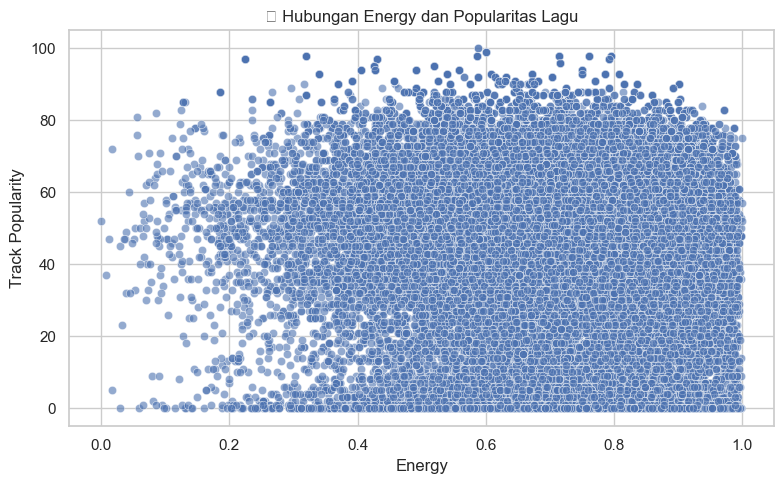

<Figure size 640x480 with 0 Axes>

In [30]:
# Popularitas Lagu dan Faktor Musik
# Pilih fitur numerik yang relevan
features = ['track_popularity', 'danceability', 'energy', 'valence',
            'acousticness', 'instrumentalness', 'liveness']

# Hitung korelasi antar fitur
correlation = df[features].corr()

# Scatter plot antara energy dan popularitas
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='energy', y='track_popularity', alpha=0.6)
plt.title("📈 Hubungan Energy dan Popularitas Lagu")
plt.xlabel("Energy")
plt.ylabel("Track Popularity")
plt.tight_layout()
plt.show()

plt.savefig("plot_hubungan_energy_dan_popularitas.png", dpi=300, bbox_inches="tight")


Danceability Berdasarkan Genre

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\20950527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_filtered, x='playlist_genre', y='danceability', jitter=True, alpha=0.5, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\20950527.py:13: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


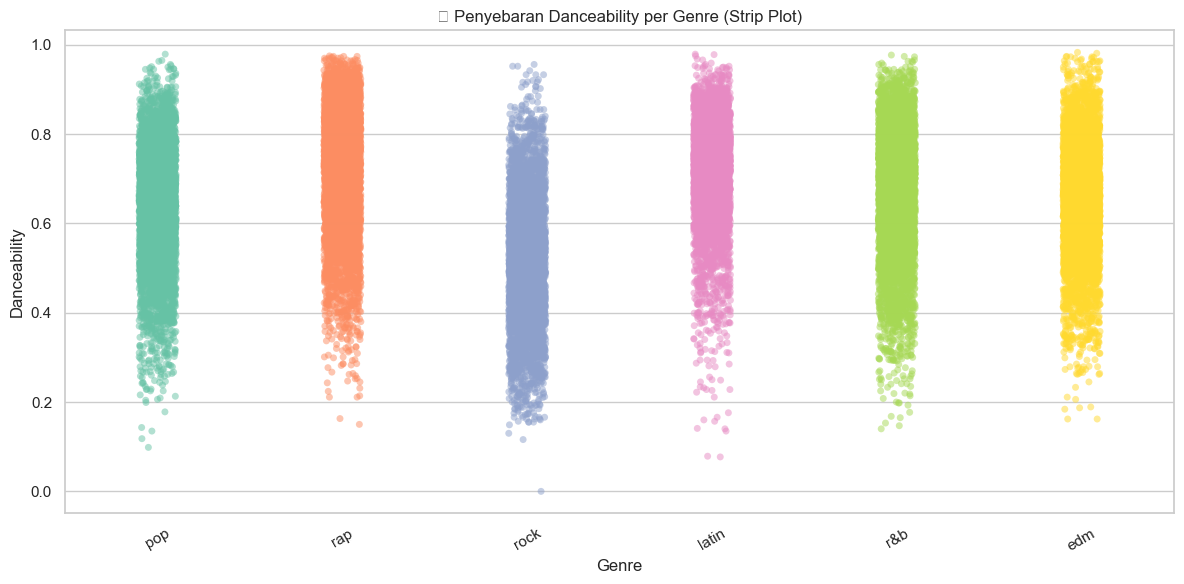

<Figure size 640x480 with 0 Axes>

In [31]:
# Danceability Berdasarkan Genre
# Filter genre dengan cukup banyak data 
genre_counts = df['playlist_genre'].value_counts()
genre_filter = genre_counts[genre_counts > 20].index  # genre dengan >20 lagu
df_filtered = df[df['playlist_genre'].isin(genre_filter)]

plt.figure(figsize=(12, 6))
sns.stripplot(data=df_filtered, x='playlist_genre', y='danceability', jitter=True, alpha=0.5, palette='Set2')
plt.title("🎯 Penyebaran Danceability per Genre (Strip Plot)")
plt.xlabel("Genre")
plt.ylabel("Danceability")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.savefig("plot_danceability.png", dpi=300, bbox_inches="tight")


Histogram & KDE Tempo

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\4185780634.py:10: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


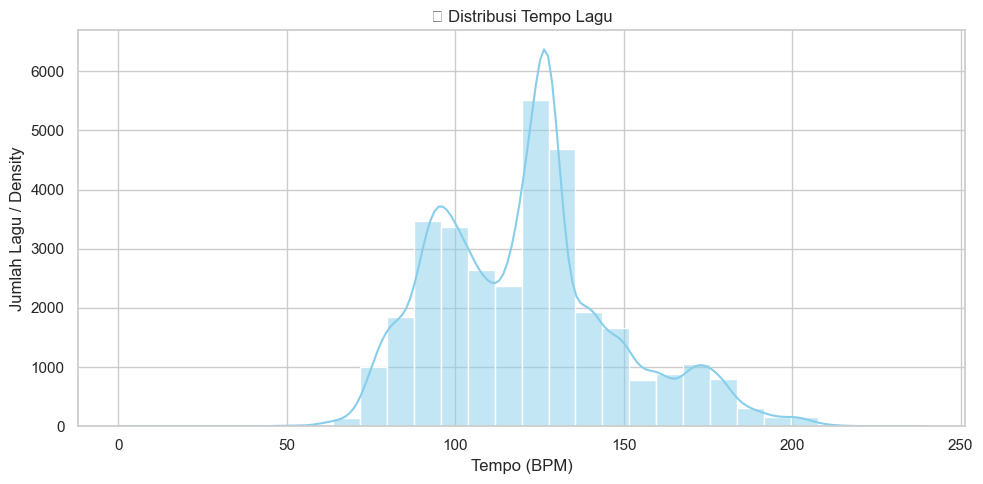

<Figure size 640x480 with 0 Axes>

In [32]:
# Set style
sns.set(style="whitegrid")

# Plot histogram + KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['tempo'], bins=30, kde=True, color='skyblue')
plt.title("🎵 Distribusi Tempo Lagu")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Jumlah Lagu / Density")
plt.tight_layout()
plt.show()

plt.savefig("plot_distribusi_tempo_lagu.png", dpi=300, bbox_inches="tight")


Mood Musik Berdasarkan Playlist

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\3219329545.py:31: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


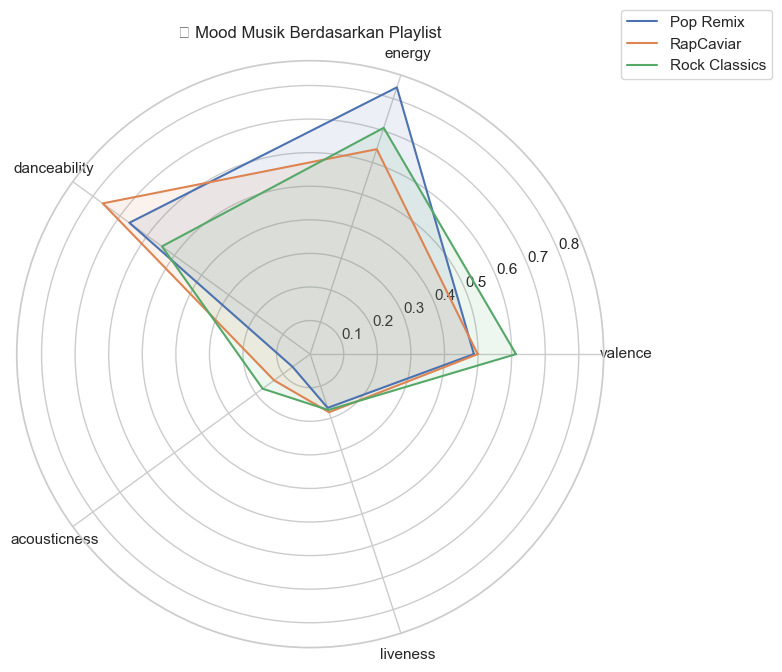

<Figure size 640x480 with 0 Axes>

In [33]:
# Pilih playlist yang ingin dibandingkan
playlist_pilihan = ['Pop Remix', 'RapCaviar', 'Rock Classics', 'Mood Booster']
fitur_mood = ['valence', 'energy', 'danceability', 'acousticness', 'liveness']

# Hitung rata-rata per playlist
playlist_means = (
    df[df['playlist_name'].isin(playlist_pilihan)]
    .groupby('playlist_name')[fitur_mood]
    .mean()
)

# Radar chart butuh data ditutup lingkaran
angles = np.linspace(0, 2 * np.pi, len(fitur_mood), endpoint=False).tolist()
angles += angles[:1]  # tutup loop

# Setup plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot per playlist
for playlist in playlist_means.index:
    values = playlist_means.loc[playlist].tolist()
    values += values[:1]  # tutup loop
    ax.plot(angles, values, label=playlist)
    ax.fill(angles, values, alpha=0.1)

# Atur label sumbu
ax.set_xticks(angles[:-1])
ax.set_xticklabels(fitur_mood)
ax.set_title("🌀 Mood Musik Berdasarkan Playlist")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

plt.savefig("plot_mood_musik_berdasarkan_playlist.png", dpi=300, bbox_inches="tight")
